In [1]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [2]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [3]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [4]:
#df = create_input_data.read_data(csv_file_name="../data/processed/past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_35_completed_qm.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,9084275,5a1c85eb8bc9d4da20ce12b96ecc7bb9d79d3ef991e990...,38112a802292edea407a0678c9c75259cba6473c7acc62...,COMPLETED,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,...,0,0,0,0,0,0,0,0,0,0
1,9084279,b4b4df9343fe9f7110ec15863fb5df13fbd20268383ba9...,9490a70089cec5b24a43f5f535efc92180fc5383256414...,COMPLETED,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,...,0,0,0,0,0,0,0,0,0,0
2,9084280,c593da51b38e5fd95cb891ec53a4b70c41ca189bf4b92d...,3a61323a47592f74d9ca0004a066b2019b8fc1d4c53283...,COMPLETED,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,...,0,0,0,0,0,0,0,0,0,0
3,9084291,db3b1cee65585e6744e72478a737eafaa23ce99e81344e...,118341ad5b87466ce69926005d0d6ba762bf86b8996da7...,COMPLETED,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,...,0,0,0,0,0,0,0,0,0,0
4,9084294,bb3cdc72e4a6895d67d00ccd3c9cf0f65bdc59f32dfa9e...,664af438b9c1ef9ba68a8105b0ce50f87b8bc462486043...,COMPLETED,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323212,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323213,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323214,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = build_features.remove_default_cols(df)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,1,1,2880,0,131060,143,20382,7955377,1080,0,...,0,0,0,0,0,0,0,0,0,0
1,78,6,180,452,131060,143,20382,7955377,76,0,...,0,0,0,0,0,0,0,0,0,0
2,68,1,1,0,131240,144,20382,7955377,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,1,2880,266,131100,142,20383,7955378,91,0,...,0,0,0,0,0,0,0,0,0,0
4,64,1,58,0,133980,143,20383,7955378,41,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = build_features.slice_df(df,1000,323216)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,1,1,120,10,268796,275,20395,7967258,10,0,...,0,0,1,0,0,0,0,0,0,0
1001,1,1,120,9,268916,276,20395,7967258,9,0,...,0,0,1,0,0,0,0,0,0,0
1002,1,1,120,9,269036,277,20395,7967258,9,0,...,0,0,1,0,0,0,0,0,0,0
1003,1,1,120,9,269156,278,20395,7967258,8,0,...,0,0,1,0,0,0,0,0,0,0
1004,1,1,120,9,269276,279,20395,7967258,8,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
### Remove the queue_minutes column from the training set
X_historydata=build_features.remove_specific_col(df,'queue_minutes')
Y_waittimedata=df['queue_minutes']

In [9]:
X_historydata
#Y_waittimedata

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,1,1,120,268796,275,20395,7967258,10,0,0,...,0,0,1,0,0,0,0,0,0,0
1001,1,1,120,268916,276,20395,7967258,9,0,0,...,0,0,1,0,0,0,0,0,0,0
1002,1,1,120,269036,277,20395,7967258,9,0,0,...,0,0,1,0,0,0,0,0,0,0
1003,1,1,120,269156,278,20395,7967258,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1004,1,1,120,269276,279,20395,7967258,8,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,898116,394,22918,9692906,23,0,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,898236,395,22918,9692906,54,0,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,898356,396,22918,9692906,38,0,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,898356,396,22918,9692906,129,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_historydata_train_rm, X_historydata_test_rm, Y_waittimedata_train, Y_waittimedata_test=build_features.split_training_test_data(X_historydata, Y_waittimedata)

shapes: X train: (241662, 43) Y train: (241662,)
shapes: X test: (80554, 43)Y test: (80554,)


In [11]:
X_historydata_test = build_features.remove_specific_col(X_historydata_test_rm,'run_minutes')
X_historydata_train = build_features.remove_specific_col(X_historydata_train_rm,'run_minutes')

In [12]:
X_historydata_train

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
217891,48,1,120,152340,84,22226,9143715,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61850,120,5,120,617365,358,20807,8085582,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57136,2,1,60,254110,174,20804,8084622,1,0,0,...,219,201,193,192,177,132,70,59,48,48
121508,240,20,6,3642,14,21179,8272622,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182686,16,1,119,18060,8,21894,8932031,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120879,64,1,2880,45055,87,21169,8268322,1,39,35,...,1,71,68,68,67,67,67,67,67,65
260178,16,1,119,0,0,22480,9318710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132932,96,2,15,39120,27,21315,8345656,0,0,0,...,0,0,0,6,0,0,0,0,0,0
147867,44,1,2880,289270,160,21442,8411807,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_historydata_norm, scaler = build_features.standardization(X_historydata_train)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 9.000000e+03 1.414325e+06 7.010000e+02
 2.291800e+04 9.692906e+06 6.670000e+02 3.154000e+03 3.154000e+03
 3.155000e+03 3.156000e+03 3.158000e+03 3.164000e+03 3.191000e+03
 3.192000e+03 3.193000e+03 3.193000e+03 3.195000e+03 3.195000e+03
 3.205000e+03 3.239000e+03 3.156000e+03 3.158000e+03 3.164000e+03
 3.191000e+03 3.192000e+03 3.269000e+03 3.193000e+03 3.195000e+03
 3.284000e+03 3.205000e+03 3.287000e+03 3.239000e+03 3.288000e+03
 3.290000e+03 3.239000e+03 3.291000e+03 3.269000e+03 3.269000e+03
 3.269000e+03 3.284000e+03]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 2.039500e+04 7.967258e+06 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+

In [44]:
import joblib
joblib.dump(scaler, '35_lookback_asym_scaler.gz')

['35_lookback_asym_scaler.gz']

In [14]:
#h5_file="../models/25past_corrected_qm_model.h5"
model = train_model.create_model_with_asymmetric_loss_4(input_shape=42)
#checkpoint_cb,early_stopping_cb = train_model.create_checkpoint_cb(h5_file=h5_file)
#model, hist = train_model.train_model(X_historydata_norm, Y_waittimedata_train, model, epochs=150, batch_size=64, validation_spilt=0.2)
early_stopping_cb = train_model.set_early_stopping()
model, hist = train_model.train_model_cb(X_historydata_norm, Y_waittimedata_train, model, early_stopping_cb,epochs=250, batch_size=64, validation_spilt=0.2)

Epoch 1/250
Tensor("custom_asymmetric_loss_4/sub:0", shape=(None, 1), dtype=float32)
Tensor("custom_asymmetric_loss_4/SelectV2_1:0", shape=(None, None), dtype=float32)
Tensor("custom_asymmetric_loss_4/sub:0", shape=(None, 1), dtype=float32)
Tensor("custom_asymmetric_loss_4/SelectV2_1:0", shape=(None, None), dtype=float32)
2972/3021 [============================>.] - ETA: 0s - loss: 227838.3281 - mae: 98.5770Tensor("custom_asymmetric_loss_4/sub:0", shape=(None, 1), dtype=float32)
Tensor("custom_asymmetric_loss_4/SelectV2_1:0", shape=(None, None), dtype=float32)
3021/3021 [==============================] - 2s 728us/step - loss: 226643.9531 - mae: 98.3648 - val_loss: 236191.9688 - val_mae: 99.8186
Epoch 2/250
3021/3021 [==============================] - 2s 704us/step - loss: 201265.5938 - mae: 92.4921 - val_loss: 211462.3906 - val_mae: 94.2506
Epoch 3/250
3021/3021 [==============================] - 2s 695us/step - loss: 176552.5000 - mae: 87.1955 - val_loss: 190135.4062 - val_mae: 84.046

In [15]:
predict_model.evaluate(model,scaler,X_historydata_test, Y_waittimedata_test)

2518/2518 [==============================] - 1s 457us/step - loss: 116653.0703 - mae: 78.7929
loss — -> 116653.0703125
mae — -> 78.79288482666016


In [16]:
from importlib import reload
reload(predict_model)
y_pred = predict_model.predict_and_compare(model,scaler, X_historydata_test, Y_waittimedata_test)

2518/2518 [==============================] - 1s 414us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :55038
number of zeros in the data : 0
number of positive numbers  :25516

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 55038
number of positive numbers  :25516



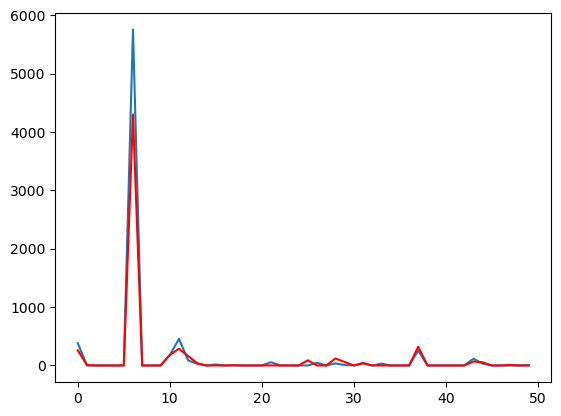

In [17]:
reload(predict_model)
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 150, 200)

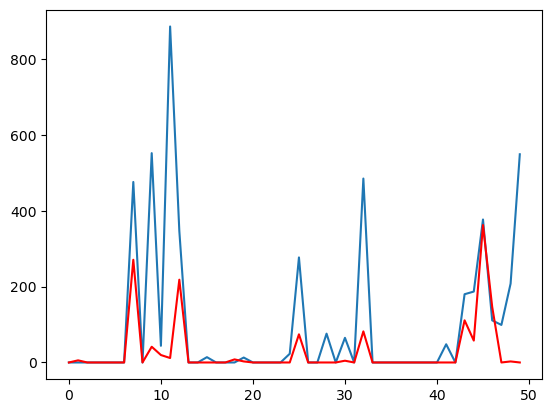

In [18]:
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test, y_pred, 200,250)


In [19]:
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,207,210, "set 1: 207: 210")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,225,228, "set2: 225-228")
predict_model.inspect_test_data(X_historydata_test,Y_waittimedata_test,y_pred,228, 231, "set3: 228-231")

------------------set 1: 207: 210-----------------------
qm test:[476   0 552]
qm pred:[270.84714    0.        41.472042]
X test:        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
12287       128       8          960           279632               345   
221064        6       1           60           510355               301   
162775      192       3          720            57405               125   

        running_num_jobs  running_minutes  qm1  qm2  qm3  ...  qm26  qm27  \
12287              20440          7989204    1    0    0  ...     0     1   
221064             22259          9161393    0    0    7  ...     4     5   
162775             21691          8754769    1    0    0  ...     0     0   

        qm28  qm29  qm30  qm31  qm32  qm33  qm34  qm35  
12287      0     1     0     0     0     0     0     0  
221064     0     1    46    46    47    47    48    48  
162775     0     0     0     0     0     0     0     0  

[3 rows x 42 columns]
----------

In [20]:
print(X_historydata_test_rm)
run_mins = X_historydata_test_rm["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))


        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
67571       256       8          120           287137               134   
50519        96       2           15            97795                71   
204988       64       1         2880             9360                 4   
213449       32       1          900            95220                75   
199380       32       1          720             1440                 2   
...         ...     ...          ...              ...               ...   
20257       128       2         1440           300982               226   
231778       48       1          120            60330                45   
273373       64       2          240                0                 0   
141023       96       2           15                0                 0   
172448      144       3            5            37980                15   

        running_num_jobs  running_minutes  run_minutes  qm1  qm2  ...  qm26  \
67571              2

In [33]:
reload(analyze_pred)
from sklearn.metrics import r2_score,mean_absolute_error


def analysis_pred(provision_time):
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    r2_scores=[]
    maes = []
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata_test, y_pred.ravel(), nnodes,run_mins,    
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(35)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata_test.to_numpy(),y_pred)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred))
    return past_K,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes                           

In [34]:
import pandas as pd
reload(analyze_pred)
lo=0
offset=80554
provision_times=[20, 45, 60, 90]
tolerance_factor=3

rdf = pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    #print(" ========= Provision time = " + str(provision_time))
    pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num, r2_scores, maes = analysis_pred(provision_time)
    #rdf = analyze_pred.add_to_df(pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    #print(rdf.to_string())
    #if provision_time == 20:
    #    rdf = analyze_pred.append_to_df(rdf,pastk,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    #else:
    for i in range(0, len(pastk)):
        #print("num_scheduled: " + str(num_scheduled[i]))
        rdf =  analyze_pred.append_to_df(rdf,pastk[i],ptime[i], num_scheduled[i], num_missed[i], not_missed[i], wrongly_scheduled[i], total_num[i],r2_scores[i],maes[i])
     

In [35]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,35,20,15946,5696,10250,1945,80554,0.553366,62.503055
1,35,45,11288,4631,6657,1369,80554,0.553366,62.503055
2,35,60,9585,4238,5347,1292,80554,0.553366,62.503055
3,35,90,7196,4019,3177,795,80554,0.553366,62.503055


In [43]:
# write to file
from pathlib import Path  
filepath = Path('../reports/asym_4_fnn_model_layer1_30_layer2_100_100results.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

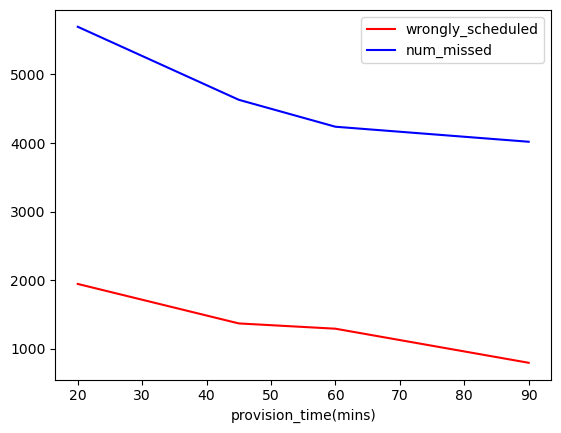

In [39]:
import matplotlib.pyplot as plt
pastk=35
color=['y','g','r','b']
#i=0
line1, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'wrongly_scheduled'],'r')   
line2, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'num_missed'],'b')
#line3, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],rdf.loc[rdf['past_k']==pastk,'not_missed'],'g')
line1.set_label('wrongly_scheduled')
line2.set_label('num_missed')
#line3.set_label('not_missed')
plt.xlabel('provision_time(mins)')
#plt.ylabel('num_missed jobs')
plt.legend()

percentage_wrongly_scheduled: 
0    2.414529
1    1.699481
2    1.603893
3    0.986916
dtype: float64
percentage_num_missed: 
0    35.720557
1    41.025868
2    44.214919
3    55.850472
dtype: float64
percentage_num_scheduled: 
0    19.795417
1    14.012960
2    11.898850
3     8.933138
dtype: float64
percentage_not_missed: 
0    64.279443
1    58.974132
2    55.785081
3    44.149528
dtype: float64


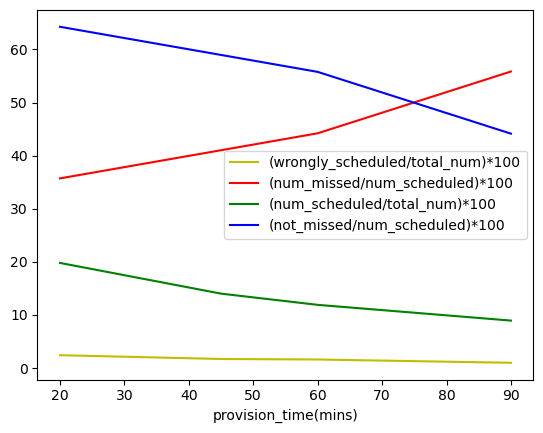

In [40]:
pastk=35
color=['y','g','r','b']
#print("provision_time for look back 35 " + str([rdf['past_k']==pastk,'provision_time']))
percentage_wrongly_scheduled = (rdf.loc[rdf['past_k']==pastk,'wrongly_scheduled']/rdf.loc[rdf['past_k']==pastk,'total_num'])*100.00
print("percentage_wrongly_scheduled: \n"+ str(percentage_wrongly_scheduled))
line1, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_wrongly_scheduled,'y')
line1.set_label('(wrongly_scheduled/total_num)*100')
plt.xlabel('provision_time(mins)')

percentage_num_missed = (rdf.loc[rdf['past_k']==pastk,'num_missed']/rdf.loc[rdf['past_k']==pastk,'num_scheduled'])*100.00
print("percentage_num_missed: \n" + str(percentage_num_missed))
line2, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_num_missed,'r')
line2.set_label('(num_missed/num_scheduled)*100')
#plt.xlabel('provision_time(mins)')

percentage_num_scheduled = (rdf.loc[rdf['past_k']==pastk,'num_scheduled']/rdf.loc[rdf['past_k']==pastk,'total_num'])*100.00
print("percentage_num_scheduled: \n" + str(percentage_num_scheduled))
line3, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_num_scheduled,'g')
line3.set_label('(num_scheduled/total_num)*100')
#plt.xlabel('provision_time(mins)')
#plt.ylabel('wrongly_scheduled jobs')

percentage_not_missed = (rdf.loc[rdf['past_k']==pastk,'not_missed']/rdf.loc[rdf['past_k']==pastk,'num_scheduled'])*100.00
print("percentage_not_missed: \n" + str(percentage_not_missed))
line4, = plt.plot(rdf.loc[rdf['past_k']==pastk,'provision_time'],percentage_not_missed,'b')
line4.set_label('(not_missed/num_scheduled)*100')
plt.legend()


In [42]:
from sklearn.metrics import r2_score
r2_score(Y_waittimedata_test.to_numpy(),y_pred)

0.5533660177464862

In [45]:
######
### Prediction

In [47]:
df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_35_completed_qm.csv", parse_dates_col=[4,5,6])

In [48]:
df25 = build_features.remove_default_cols(df25)

In [49]:
df25

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,48,1,120,1,898116,393,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
1,48,1,120,1,898236,394,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
2,48,1,120,1,898356,395,22918,9692906,44,0,...,0,0,0,0,0,0,0,0,0,0
3,48,1,120,1,898476,396,22918,9692906,41,0,...,0,0,0,0,0,0,0,0,0,0
4,48,1,120,1,898596,397,22918,9692906,37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,2,20560,12,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,2,20580,13,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,2,20600,14,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,2,20620,15,23053,9791106,3,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df25 = build_features.slice_df(df25,1000,69801)

In [51]:
X_historydata25=build_features.remove_specific_col(df25,'queue_minutes')
Y_waittimedata=df25['queue_minutes']

In [52]:
X_historydata25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,48,1,120,884475,429,22918,9692906,52,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,507,1,3,...,0,0,0,0,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,53,4,4,...,3,0,0,0,0,0,0,0,0,0
1003,48,1,120,882195,406,22918,9692906,60,4,4,...,3,0,0,0,0,0,0,0,0,0
1004,48,1,120,882315,407,22918,9692906,30,4,4,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_historydata_test25 = build_features.remove_specific_col(X_historydata25,'run_minutes')
X_historydata_test25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,48,1,120,884475,429,22918,9692906,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,1,3,3,...,0,0,0,0,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
1003,48,1,120,882195,406,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
1004,48,1,120,882315,407,22918,9692906,4,4,4,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Y_waittimedata

1000       4
1001     182
1002       0
1003       0
1004       0
        ... 
69796      2
69797      2
69798      2
69799      2
69800      0
Name: queue_minutes, Length: 68801, dtype: int64

In [54]:
y_pred25_aug = predict_model.predict_and_compare(model,scaler, X_historydata_test25, Y_waittimedata)

2151/2151 [==============================] - 1s 421us/step
y_pred shape : (68801, 1)
--- inspecting prediction values --- 
number of negative numbers  :48931
number of zeros in the data : 0
number of positive numbers  :19870

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 34809
number of positive numbers  :33992

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 48931
number of positive numbers  :19870



In [55]:
#print(X_historydata_test_rm)
run_mins = X_historydata25["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test25["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))

run_minutes[ 52 507  53 ...   3   3   2]
 nnodes : [ 1  4  1 ... 16 16  1]


In [79]:
def analysis_pred1(provision_time):
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    r2_scores=[]
    maes = []
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(lo,offset, Y_waittimedata, y_pred25_aug.ravel(), nnodes,run_mins,    
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    past_K.append(35)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata.to_numpy(),y_pred25_aug)
    r2_scores.append(r2s)
    maes.append(mean_absolute_error(Y_waittimedata.to_numpy(),y_pred25_aug))
    return past_K,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes         

In [80]:
import pandas as pd
reload(analyze_pred)
lo=0
offset=68801
provision_times=[20, 45, 60, 90]
tolerance_factor=3

rdf = pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    past_K=[]
    #print(" ========= Provision time = " + str(provision_time))
    pastk, ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num, r2_scores, maes = analysis_pred1(provision_time)
    for i in range(0, len(pastk)):
        #print("num_scheduled: " + str(num_scheduled[i]))
        rdf =  analyze_pred.append_to_df(rdf,pastk[i],ptime[i], num_scheduled[i], num_missed[i], not_missed[i], wrongly_scheduled[i], total_num[i],r2_scores[i],maes[i])
     

In [81]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,35,20,11585,3586,7999,3621,68801,-4.201302,389.980611
1,35,45,8928,2505,6423,3038,68801,-4.201302,389.980611
2,35,60,8166,2209,5957,2882,68801,-4.201302,389.980611
3,35,90,7182,1877,5305,2361,68801,-4.201302,389.980611


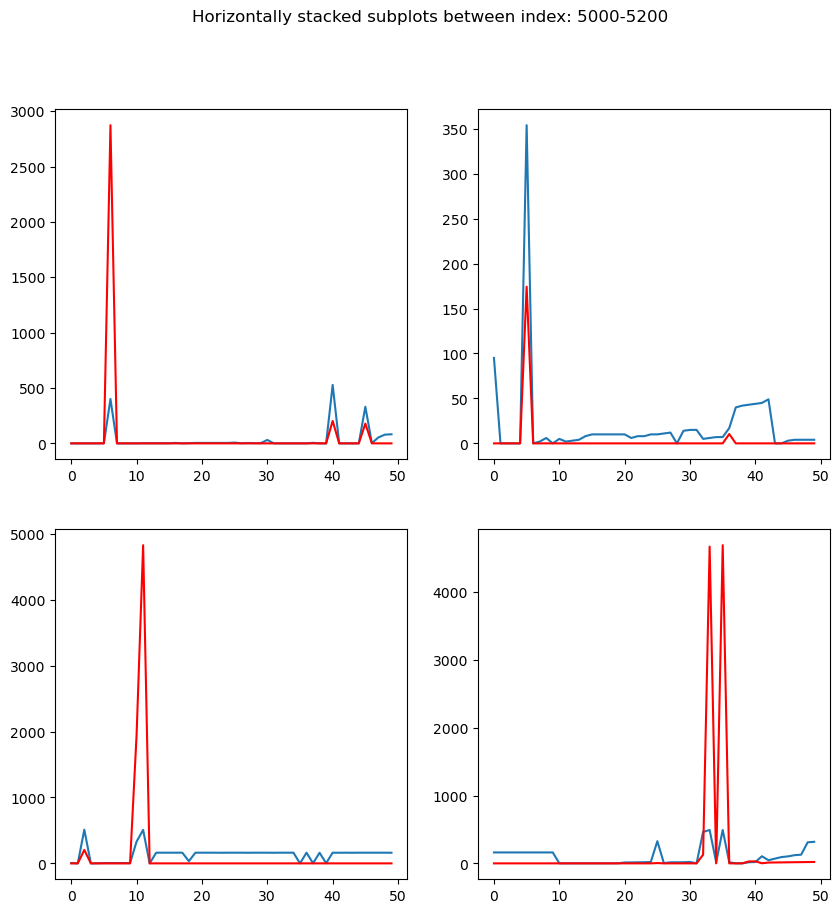

In [82]:
analyze_pred.plot_pred_vs_orig(5000,50,Y_waittimedata,y_pred25_aug.ravel())